## Notebook presentation

This notebook was made to show how you can make some quality control in your data by using useful graphs from matplotlib and seaborn libraries, as well as descriptive analytics functions from pandas. This, combined with interpretation processes, optimizes data perception and helps generate valuable insights.

## Data description

This data is from the Council Grove gas reservoir in Southwest Kansas. The Panoma Council Grove Field is predominantly a carbonate gas reservoir encompassing 2700 square miles in Southwestern Kansas. This dataset is from nine wells (with 4149 examples), consisting of a set of seven predictor variables and a rock facies (class). Facies are based on examination of cores from nine wells taken vertically at half-foot intervals. Predictor variables include five from wireline log measurements and two geologic constraining variables that are derived from geologic knowledge. These are essentially continuous variables sampled at a half-foot sample rate.

The nine discrete facies (classes of rocks) are:

1. Nonmarine sandstone
2. Nonmarine coarse siltstone
3. Nonmarine fine siltstone
4. Marine siltstone and shale
5. Mudstone (limestone)
6. Wackestone (limestone)
7. Dolomite
8. Packstone-grainstone (limestone)
9. Phylloid-algal bafflestone (limestone)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data path
rootdir = "C:/Users/lucas.aguiar/Desktop/Pastas/Estudos/Portfolio/SEG_2016_WELL_LOGS/"

In [3]:
# Data import
data = pd.read_csv(rootdir + "training_data.csv", sep=",")

In [4]:
# Data first check
print("Data Size (rows, cols):", data.shape)

data.head(10)

Data Size (rows, cols): (3232, 11)


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


In [5]:
# Checking missing data
data.isna().sum()

Facies       0
Formation    0
Well Name    0
Depth        0
GR           0
ILD_log10    0
DeltaPHI     0
PHIND        0
PE           0
NM_M         0
RELPOS       0
dtype: int64

In [6]:
# Descriptive statistics
data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [7]:
# Number of facies count
data["Facies"].value_counts()


2    738
3    615
8    498
6    462
1    259
5    217
4    184
9    161
7     98
Name: Facies, dtype: int64

In [8]:
# Facies color definitions for future plots
facies_colors = {1:'red', 2:'blue', 3:'green', 4:'orange', 5:'purple', 6:'brown', 7:'pink', 8:'gray', 9:'cyan'}

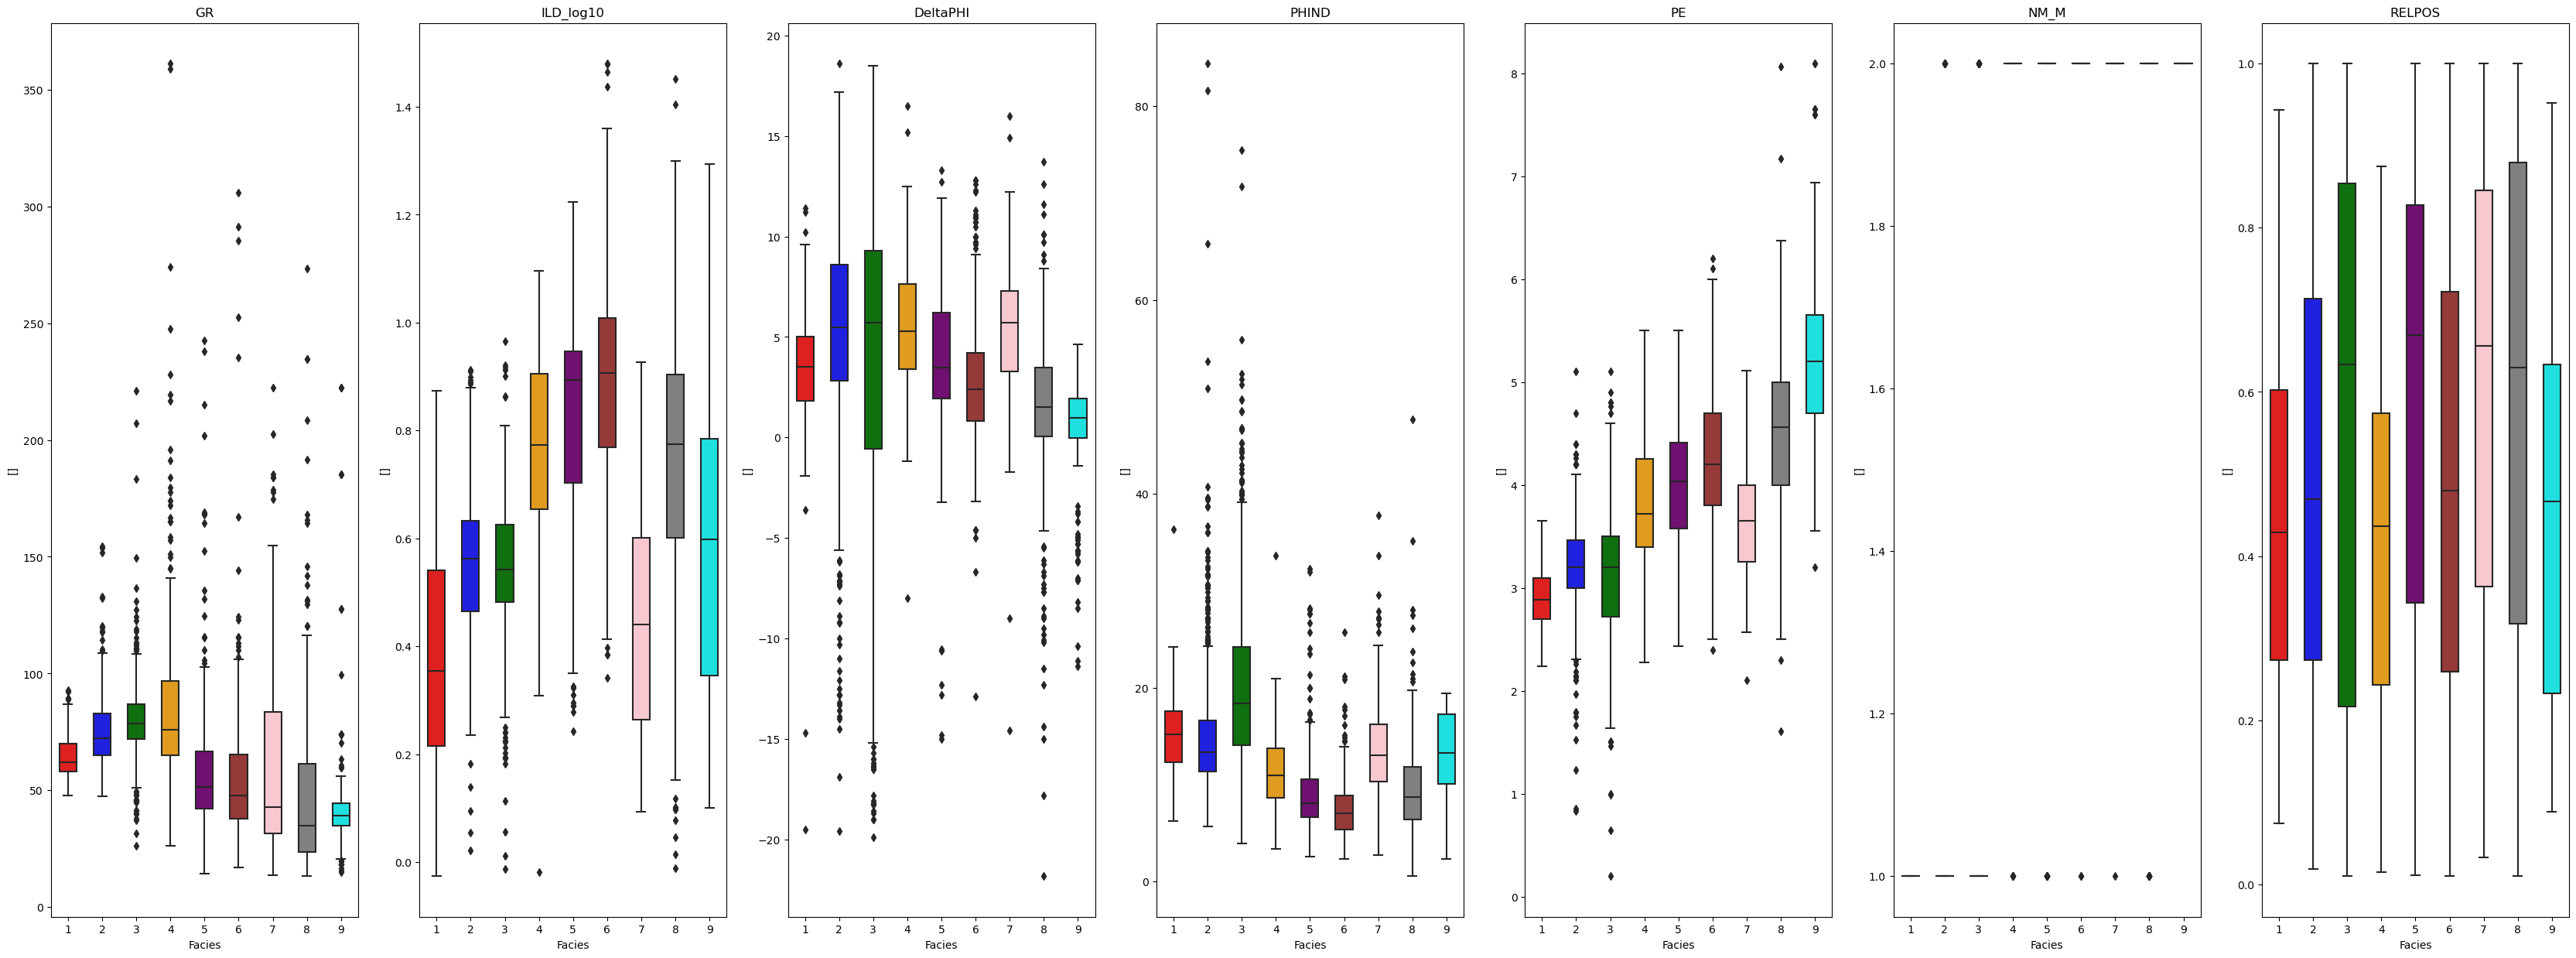

In [9]:
# Boxplot to show well logs distribution for each facies
columns_to_plot = data.drop(["Facies", "Depth", "Formation", "Well Name"], axis=1).columns
num_plots = len(columns_to_plot)

fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(6 * num_plots, 15), sharey=False)

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x="Facies", y=col, data=data, ax=axes[i], width=0.5, palette=facies_colors)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("Facies")
    axes[i].set_ylabel([])

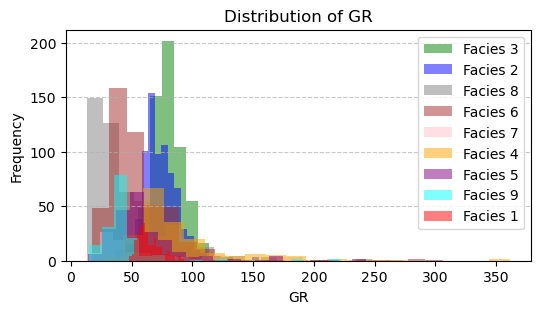

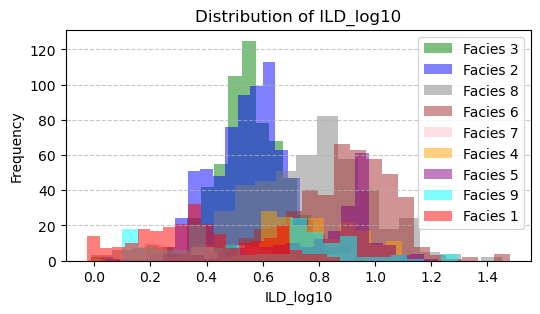

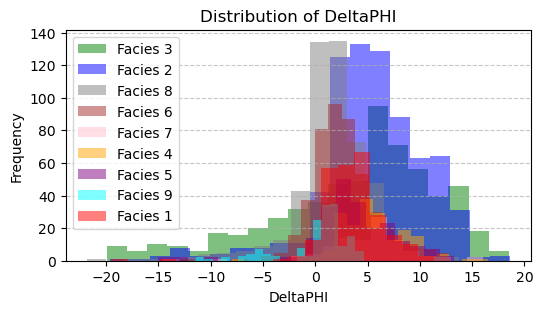

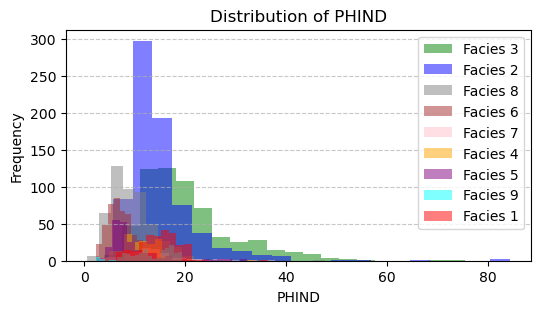

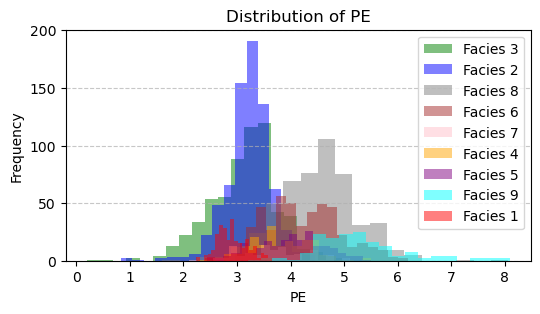

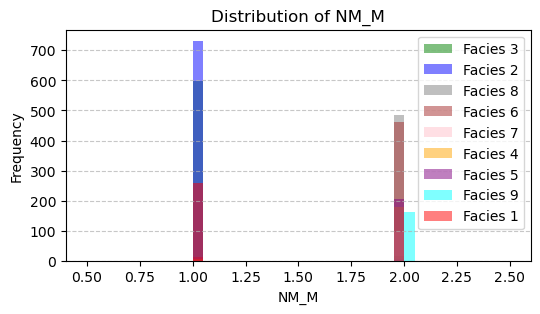

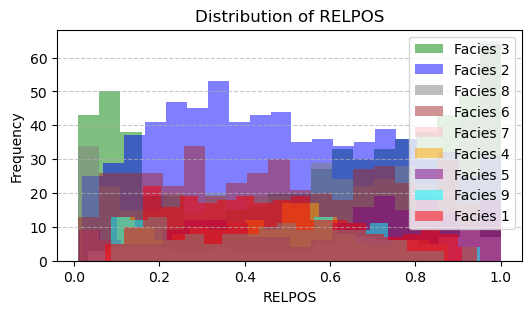

In [10]:
# Histograms for each well log separately for each facies.
for col in columns_to_plot:
    plt.figure(figsize=(6, 3))
    for facies in data['Facies'].unique():
        subset = data[data['Facies'] == facies]
        plt.hist(subset[col], bins=20, alpha=0.5, label=f'Facies {facies}', color=facies_colors[facies])
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


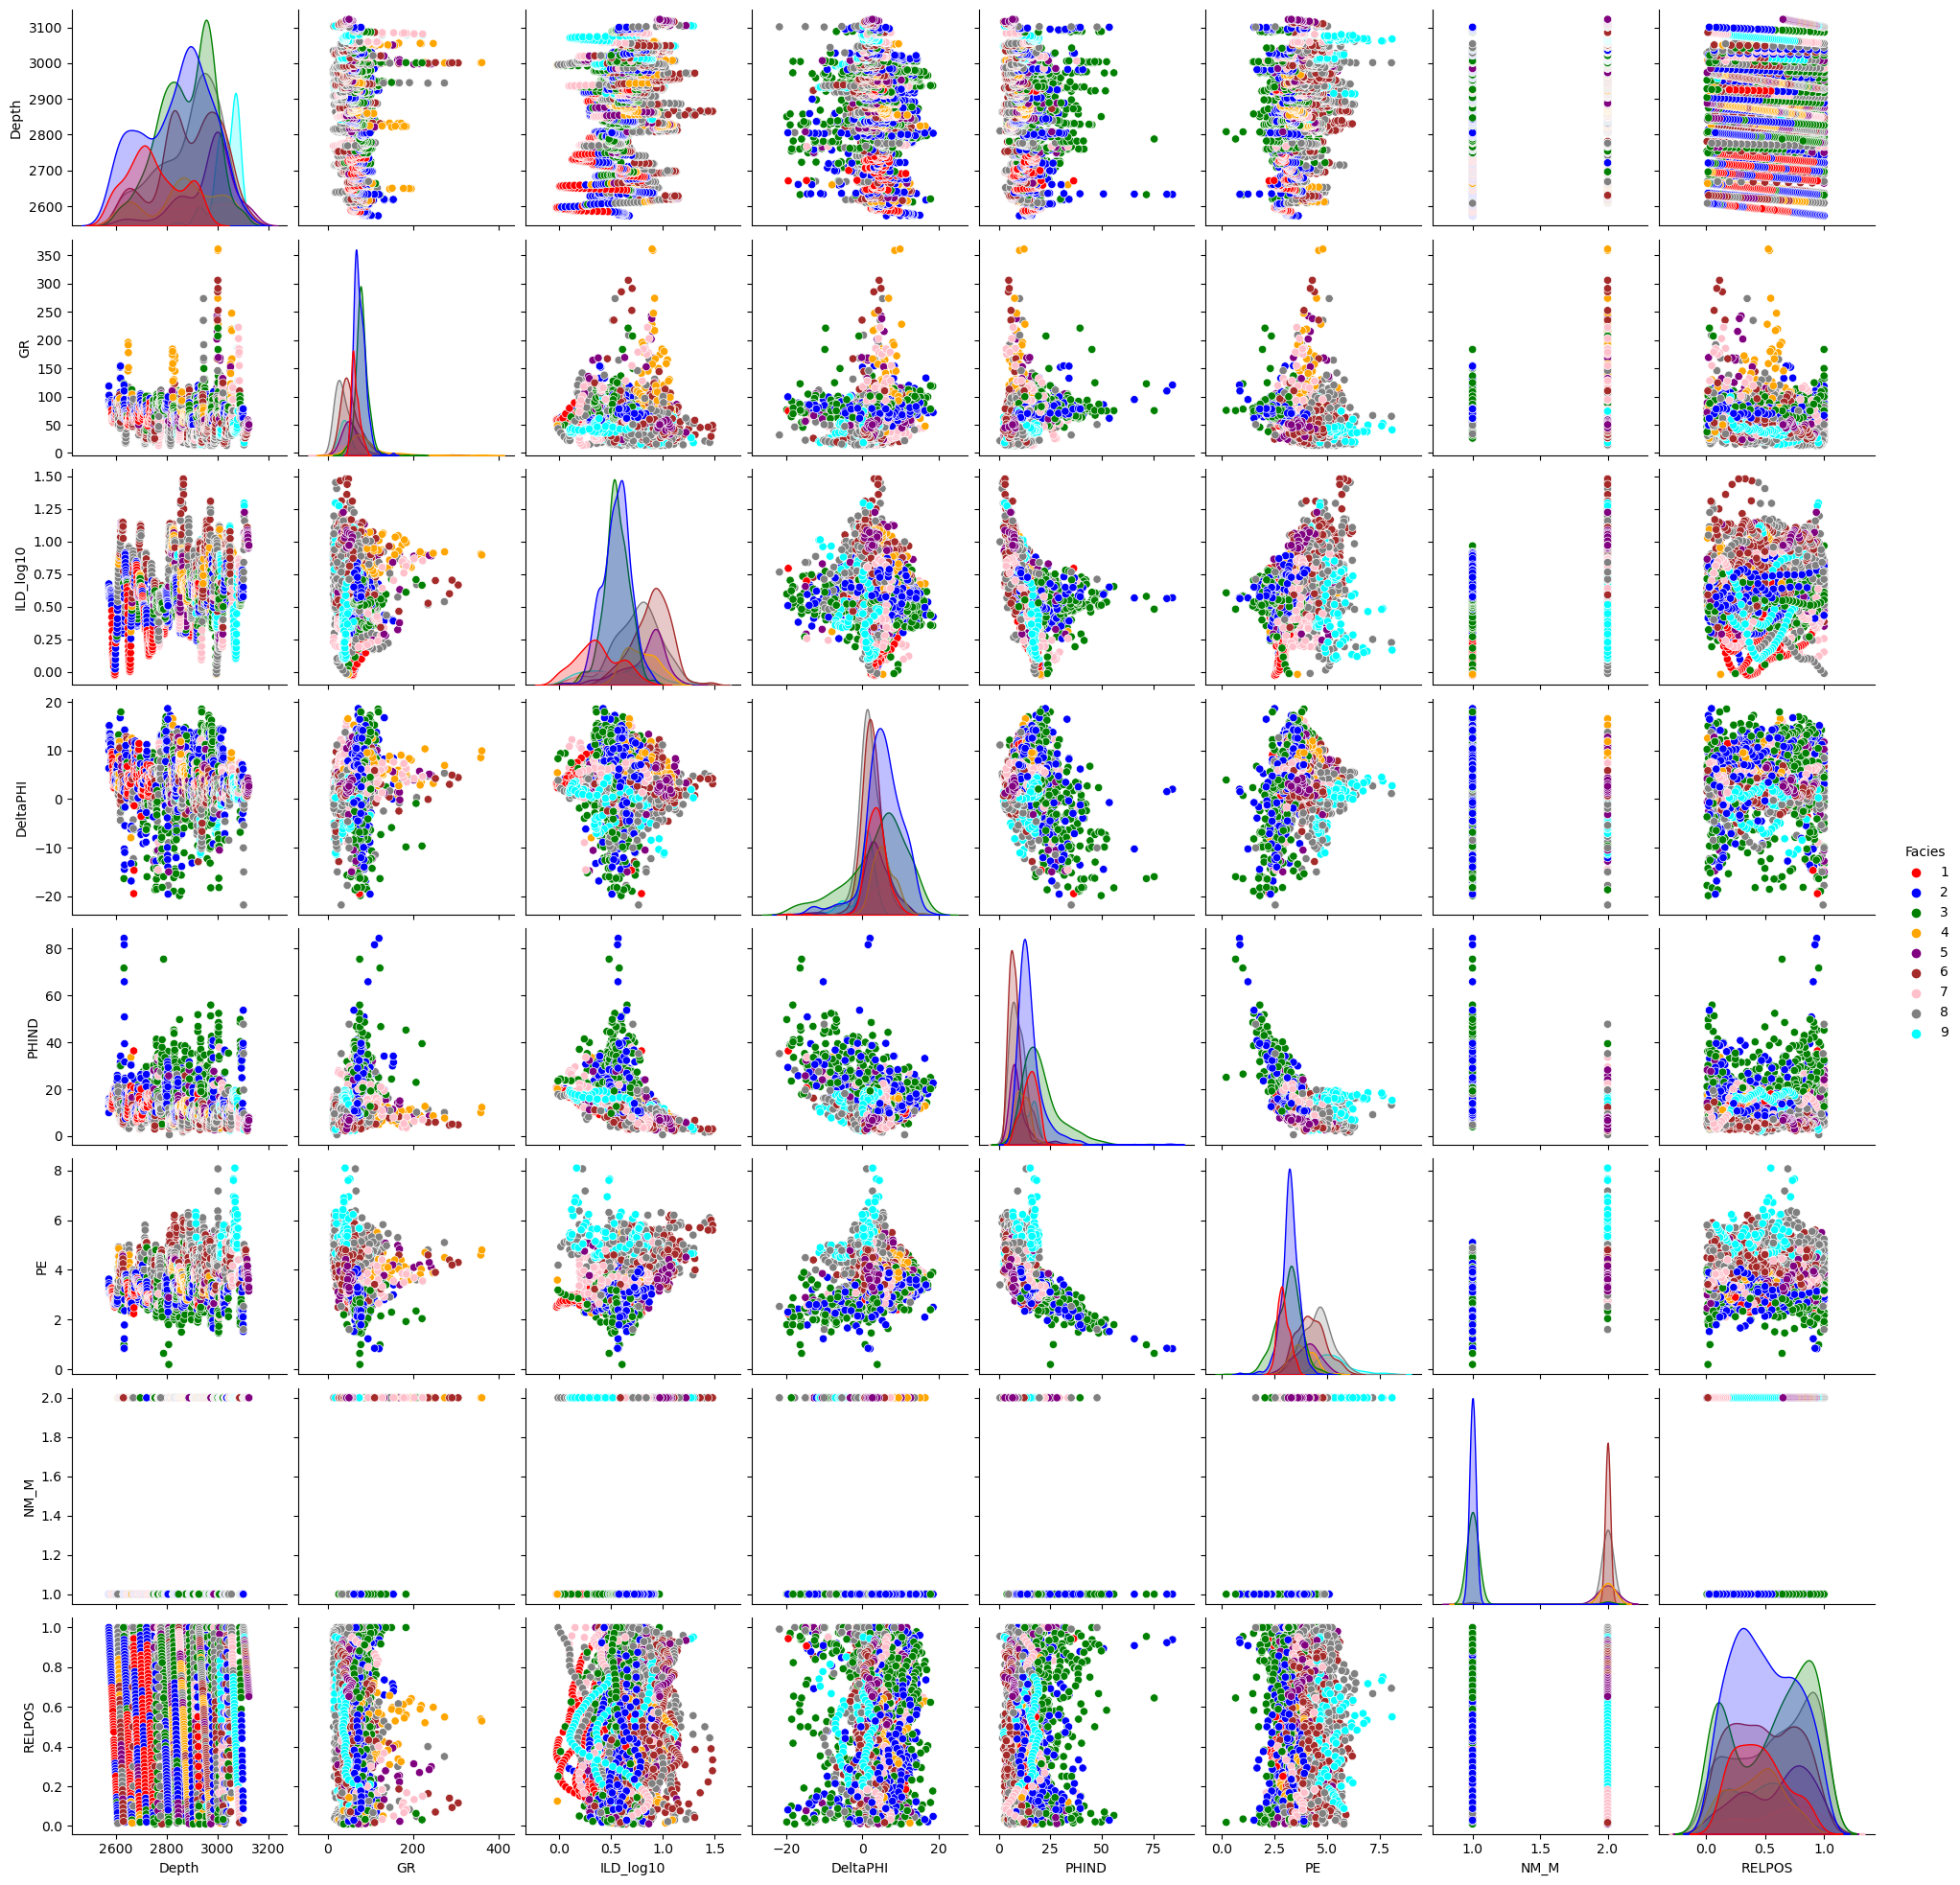

In [11]:
# Pairplot to see trends
sns.pairplot(data, hue="Facies", palette=facies_colors)

Text(0.5, 1.0, 'Pearson Correlation')

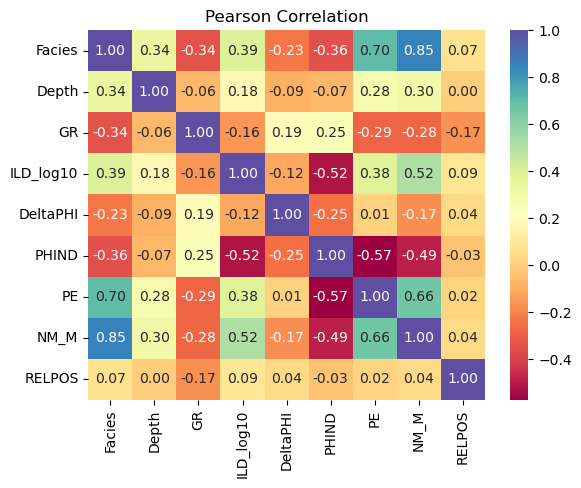

In [12]:
# Statistical correlation between well logs to find those that are most correlated with facies
sns.heatmap(data.corr(numeric_only=True), cmap="Spectral", annot=True, fmt=".2f")
plt.title("Pearson Correlation")